# First Wall notes

In [1]:
using Revise
using FUSE
using IMAS
using Plots;
FUSE.logging(Logging.Info);

## Compare FW build in MXH and simple Miller equilibria

192.275573 seconds (385.62 M allocations: 19.379 GiB, 7.88% gc time, 83.87% compilation time)
GEOMETRY                       EQUILIBRIUM                    TEMPERATURES                   DENSITIES                      
───────────────────────────    ───────────────────────────    ───────────────────────────    ───────────────────────────    
R0 → 7 [m]                     B0 → 5 [T]                     Te0 → 11.7 [keV]               ne0 → 1.09e+20 [m⁻³]           
a → 2 [m]                      ip → 8.05 [MA]                 Ti0 → 11.7 [keV]               ne_ped → 4.81e+19 [m⁻³]        
1/ϵ → 3.5 [m]                  q95 → 5.86                     <Te> → 5.24 [keV]              <ne> → 6.96e+19 [m⁻³]          
κ → 2.11                       βpol → 1.66                    <Ti> → 5.24 [keV]              ne0/<ne> → 1.57                
δ → 0.603                      βtor → 0.0168                  Te0/<Te> → 2.23                fGW → 1.27                     
ζ → -0.0674                    

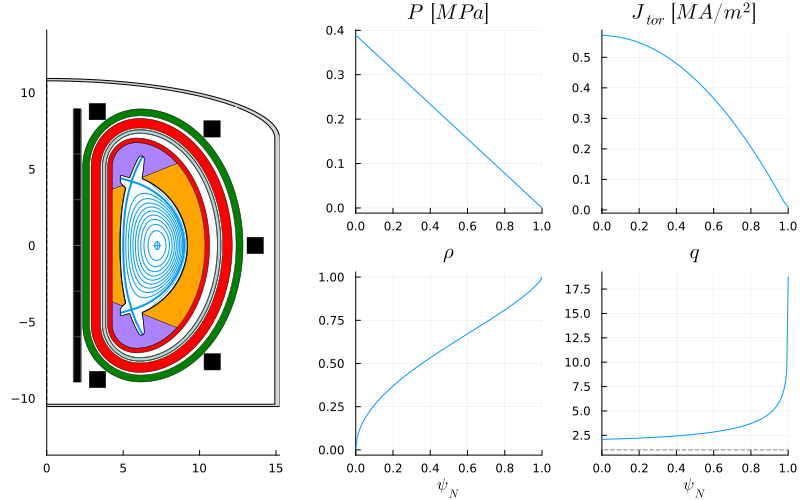

​


28×9 DataFrame
 Row │ group   details               type      ΔR        R_start   R_end     material      area        volume    
     │ String  String                String    Float64   Float64   Float64   String        Float64     Float64   
─────┼───────────────────────────────────────────────────────────────────────────────────────────────────────────
   1 │ in                                      1.73038    0.0       1.73038                 30.9036     167.996
   2 │ in                            oh        0.521326   1.73038   2.25171  ReBCO           9.31057    116.476
   3 │ in                                      0.101055   2.25171   2.35276                  1.80478     26.1068
   4 │ hfs                           tf        0.450844   2.35276   2.8036   ReBCO          20.4897     302.896
   5 │ hfs                                     0.101055   2.8036    2.90466                  7.68847    401.831
   6 │ hfs     low temp              shield    0.62197    2.90466   3.52663  Steel

​


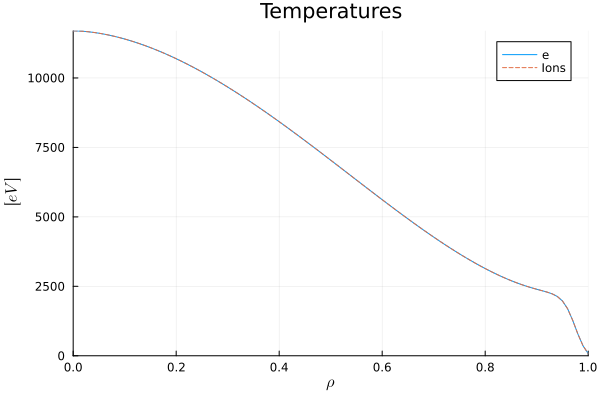

​


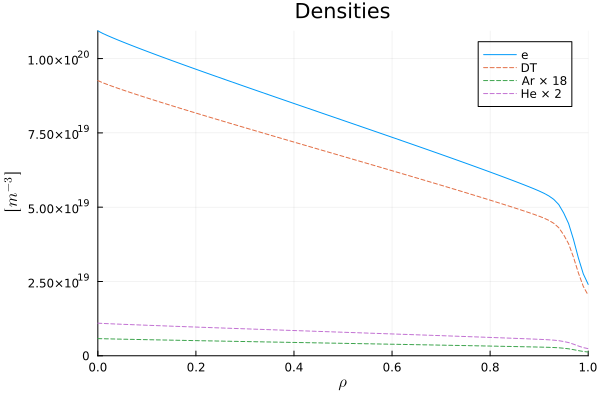

​


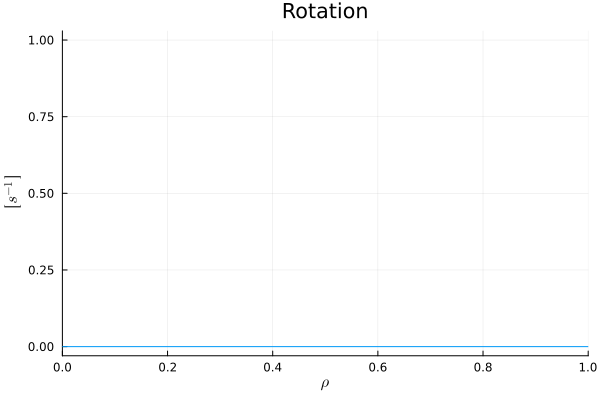

​


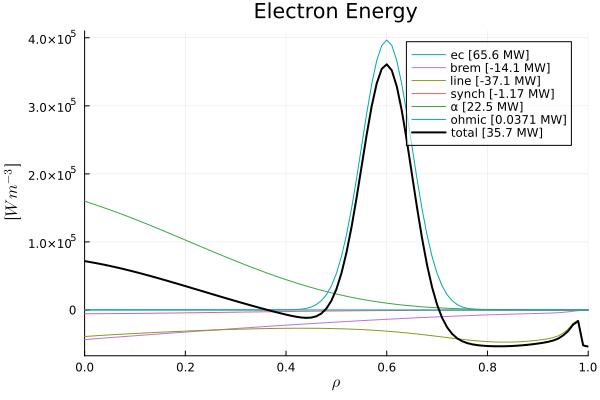

​


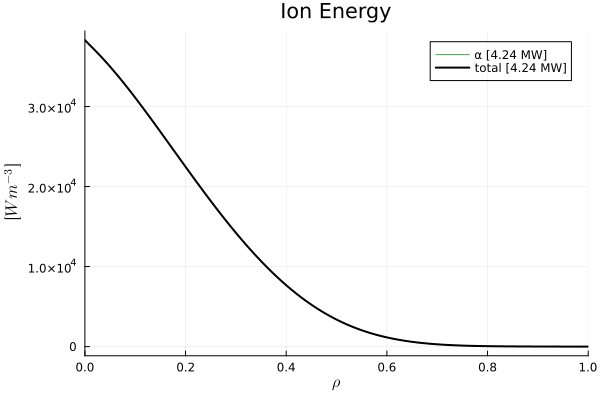

​


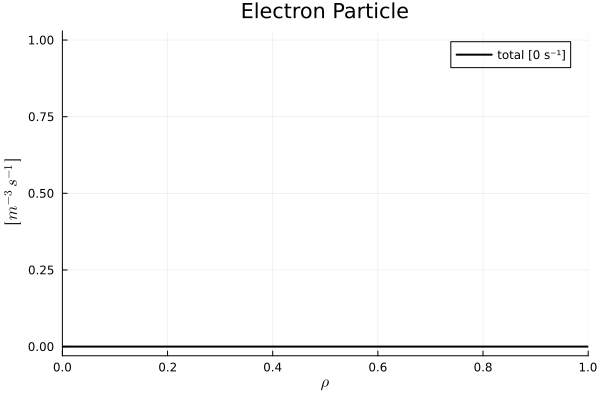

​


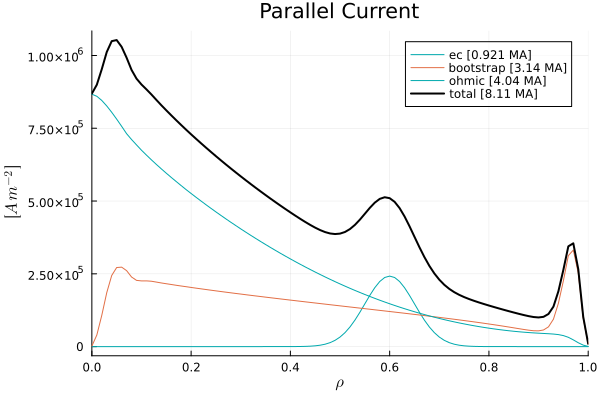

In [2]:
# CHEASE deadstart MXH for custom double-null equilibrium
ini, act = FUSE.case_parameters(:FPP, version=:v1_demount, init_from=:scalars);
act.ActorEquilibrium.model = :CHEASE
act.ActorEquilibrium.symmetrize = true
act.ActorCHEASE.free_boundary = true
act.ActorCXbuild.rebuild_wall = true

ini.equilibrium.R0 = missing # 7.0
ini.equilibrium.B0 = 5.0
ini.equilibrium.ϵ = missing # 1/3.5
ini.equilibrium.κ = missing # 2.1
ini.equilibrium.δ = missing # 0.7
ini.equilibrium.ζ = missing # 0.0

ini.build.plasma_gap = 0.1
#ini.build.symmetric = missing

mhx_order = 4
R0 = 7.0
eps = 1/3.5
a = R0*eps
kapu = 2.1
kapl = 2.1
delu = 0.7
dell = 0.7
zetaou = -0.15
zetaol = -0.0
zetaiu = -0.0
zetail = -0.15
upnull = false
lonull = false

r, z, zref = try
    IMAS.boundary_shape(; a, eps, kapu, kapl, delu, dell, zetaou, zetaiu, zetaol, zetail, zoffset=0.0, upnull, lonull)
catch e
    [NaN], [NaN], [NaN]
end

mxh = IMAS.MXH(r, z, mhx_order)
mxh_vect = IMAS.flat_coeffs(mxh)

ini.equilibrium.boundary_from = :MXH_params
ini.equilibrium.MXH_params = mxh_vect
ini.equilibrium.xpoints_number = 2

dd_sn = IMAS.dd()
@time FUSE.init(dd_sn, ini, act; do_plot=false);
FUSE.digest(dd_sn);

 32.551115 seconds (3.82 M allocations: 778.061 MiB, 1.63% gc time, 0.10% compilation time)
GEOMETRY                       EQUILIBRIUM                    TEMPERATURES                   DENSITIES                      
───────────────────────────    ───────────────────────────    ───────────────────────────    ───────────────────────────    
R0 → 7 [m]                     B0 → 5 [T]                     Te0 → 12.3 [keV]               ne0 → 1.07e+20 [m⁻³]           
a → 2 [m]                      ip → 8.03 [MA]                 Ti0 → 12.3 [keV]               ne_ped → 4.79e+19 [m⁻³]        
1/ϵ → 3.5 [m]                  q95 → 6.09                     <Te> → 5.49 [keV]              <ne> → 6.89e+19 [m⁻³]          
κ → 2.09                       βpol → 1.7                     <Ti> → 5.49 [keV]              ne0/<ne> → 1.55                
δ → 0.703                      βtor → 0.017                   Te0/<Te> → 2.23                fGW → 1.26                     
ζ → -0.00844                   βn

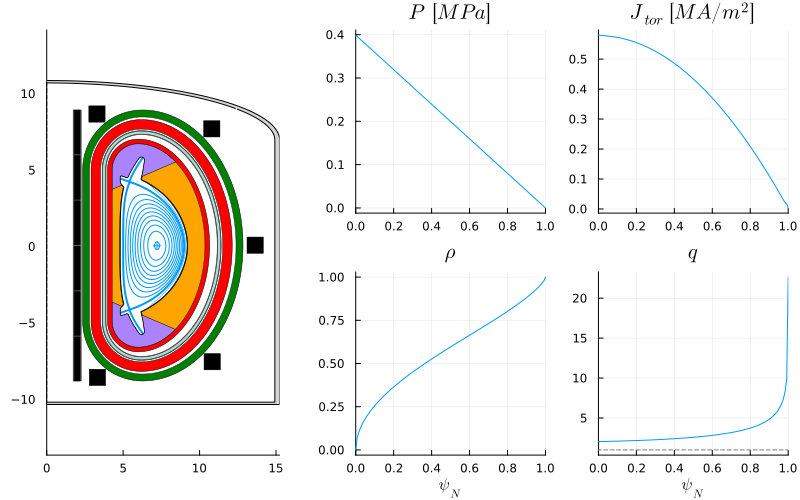

​


28×9 DataFrame
 Row │ group   details               type      ΔR         R_start   R_end     material      area        volume    
     │ String  String                String    Float64    Float64   Float64   String        Float64     Float64   
─────┼────────────────────────────────────────────────────────────────────────────────────────────────────────────
   1 │ in                                      1.73034     0.0       1.73034                 30.665      166.696
   2 │ in                            oh        0.521315    1.73034   2.25166  ReBCO           9.23871    115.575
   3 │ in                                      0.101053    2.25166   2.35271                  1.79085     25.9047
   4 │ hfs                           tf        0.450835    2.35271   2.80355  ReBCO          20.3586     300.952
   5 │ hfs                                     0.101053    2.80355   2.9046                   7.63707    400.298
   6 │ hfs     low temp              shield    0.621957    2.9046    3.526

​


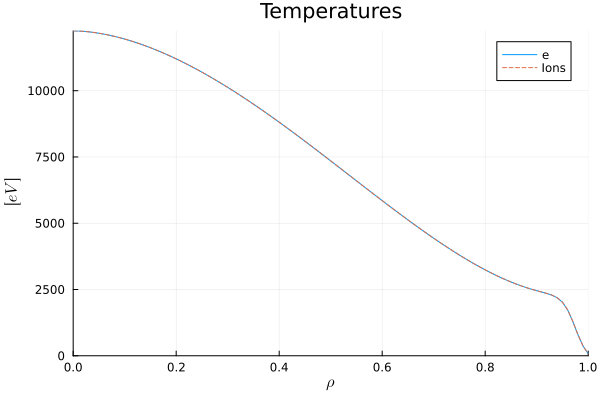

​


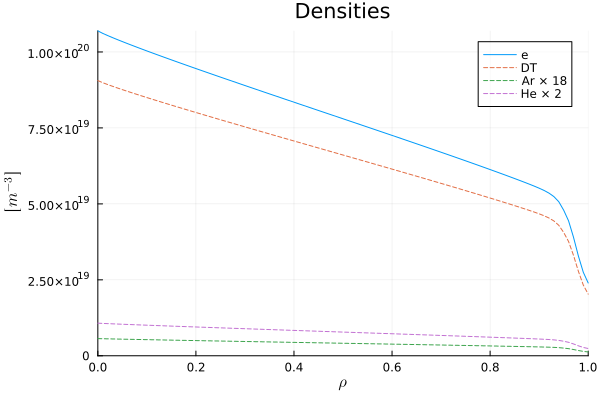

​


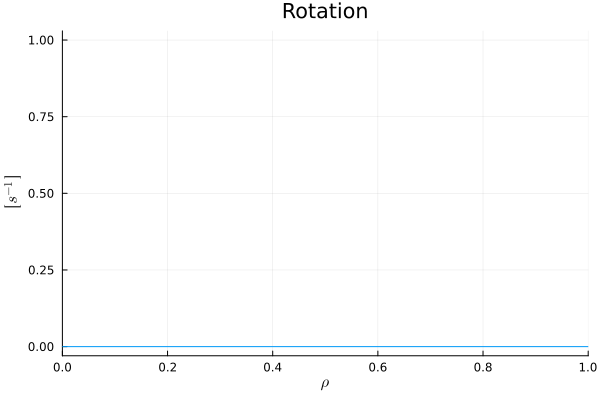

​


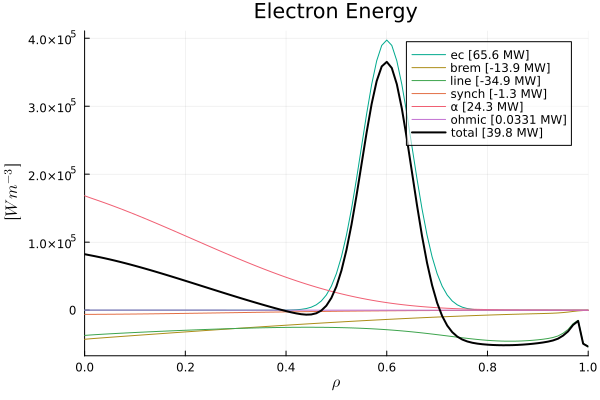

​


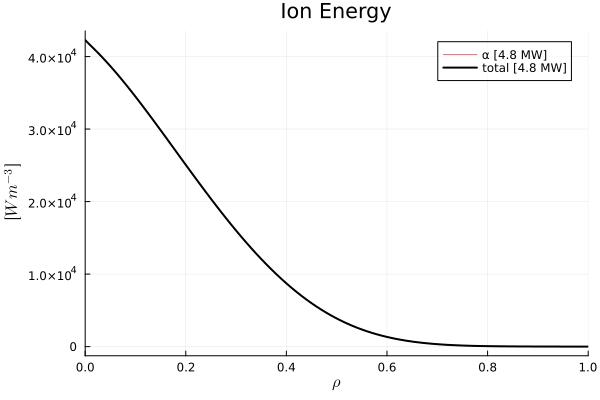

​


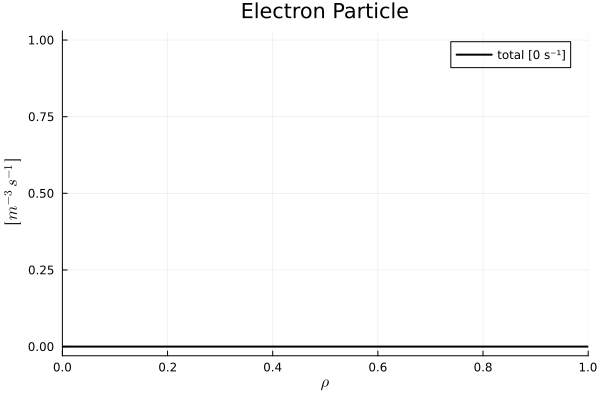

​


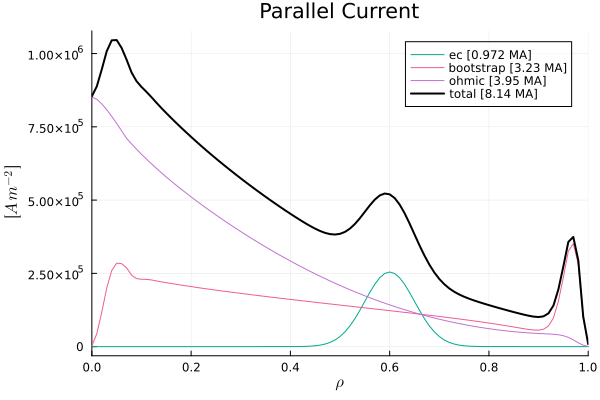

In [3]:
# CHEASE deadstart Miller for custom double-null equilibrium
ini, act = FUSE.case_parameters(:FPP, version=:v1_demount, init_from=:scalars);
act.ActorEquilibrium.model = :CHEASE
act.ActorEquilibrium.symmetrize = true
act.ActorCHEASE.free_boundary = true
act.ActorCXbuild.rebuild_wall = true

ini.equilibrium.R0 = 7.0 
ini.equilibrium.B0 = 5.0
ini.equilibrium.ϵ = 1/3.5
ini.equilibrium.κ = 2.1
ini.equilibrium.δ = 0.7
ini.equilibrium.ζ = 0.0

ini.build.plasma_gap = 0.1
#ini.build.symmetric = missing

ini.equilibrium.xpoints_number = 2

dd_dn = IMAS.dd()
@time FUSE.init(dd_dn, ini, act; do_plot=false);
FUSE.digest(dd_dn);

## Compare FW conformal layers settings

GEOMETRY                       EQUILIBRIUM                    TEMPERATURES                   DENSITIES                      
───────────────────────────    ───────────────────────────    ───────────────────────────    ───────────────────────────    
R0 → 4.82 [m]                  B0 → 4.71 [T]                  Te0 → 22.4 [keV]               ne0 → 2.29e+20 [m⁻³]           
a → 1.38 [m]                   ip → 8 [MA]                    Ti0 → 22.4 [keV]               ne_ped → 1.01e+20 [m⁻³]        
1/ϵ → 3.5 [m]                  q95 → 5.31                     <Te> → 9.55 [keV]              <ne> → 1.47e+20 [m⁻³]          
κ → 2.3                        βpol → 4.18                    <Ti> → 9.55 [keV]              ne0/<ne> → 1.55                
δ → 0.85                       βtor → 0.0813                  Te0/<Te> → 2.34                fGW → 1.26                     
ζ → 0.0423                     βn → 6.6                       Ti0/<Ti> → 2.34                zeff_ped → 2                   


​


28×9 DataFrame
 Row │ group   details               type      ΔR         R_start   R_end     material      area       volume     
     │ String  String                String    Float64    Float64   Float64   String        Float64    Float64    
─────┼────────────────────────────────────────────────────────────────────────────────────────────────────────────
   1 │ in                                      1.19812     0.0       1.19812                16.4069      61.7556
   2 │ in                            oh        0.353738    1.19812   1.55186  ReBCO          4.84401     41.849
   3 │ in                                      0.0696444   1.55186   1.62151                 0.953697     9.50781
   4 │ hfs                           tf        0.310643    1.62151   1.93215  ReBCO         11.8518     120.748
   5 │ hfs                                     0.0696444   1.93215   2.00179                31.0214    1661.91
   6 │ hfs     low temp              shield    0.42866     2.00179   2.43045  

​


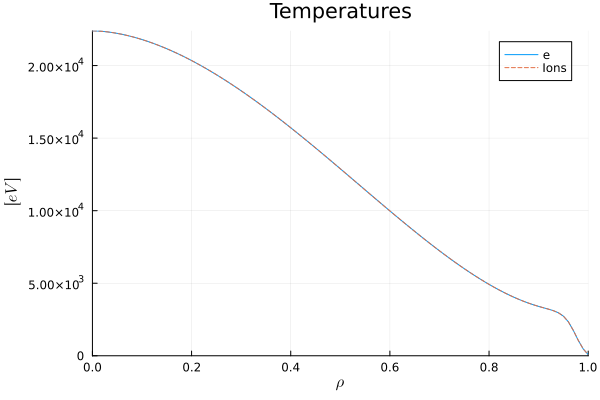

​


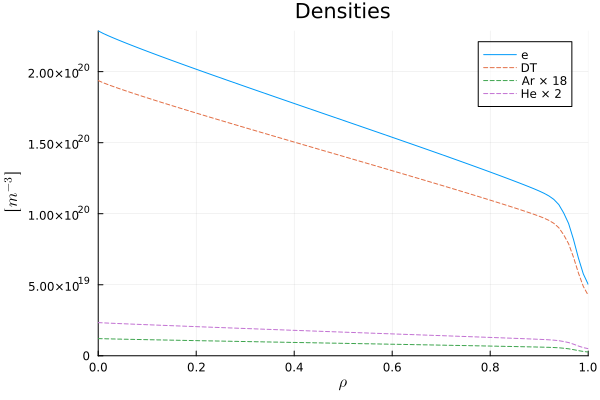

​


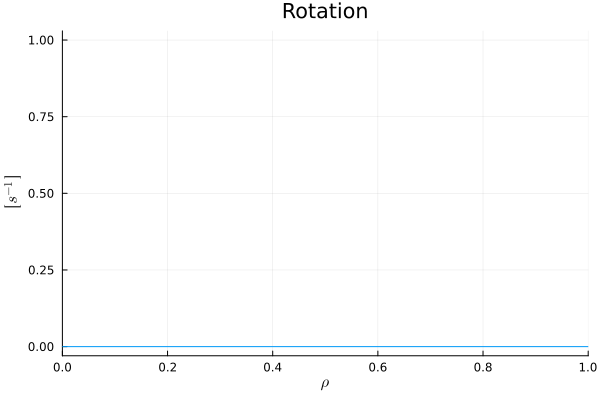

​


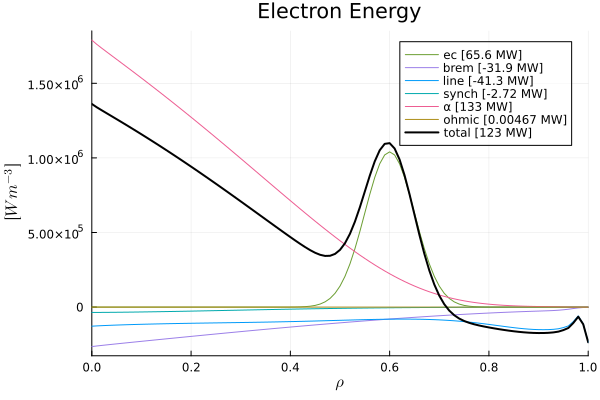

​


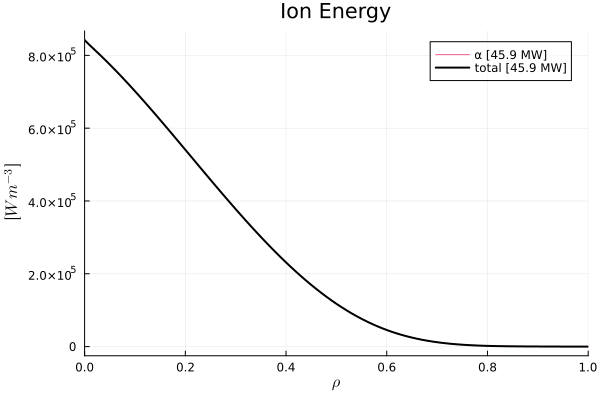

​


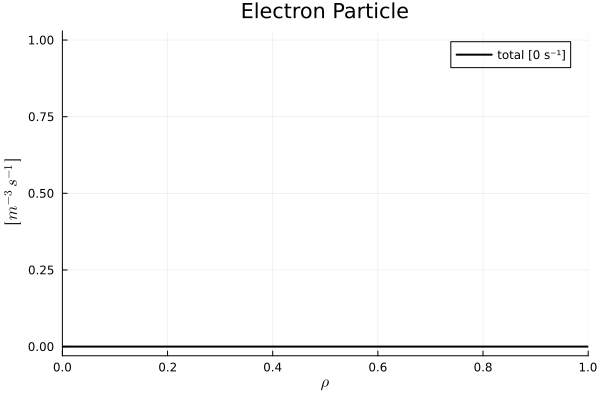

​


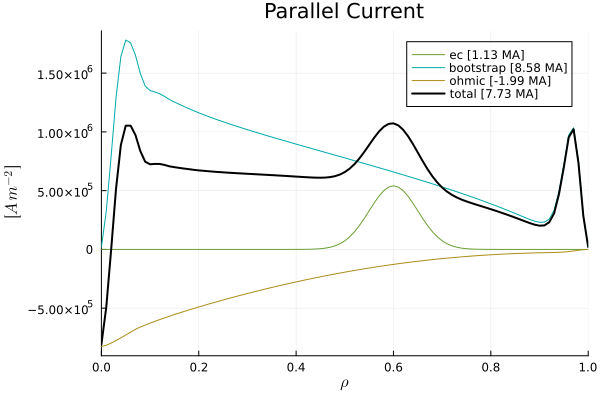

In [4]:
ini, act = FUSE.case_parameters(:FPP; version=:v1, init_from=:scalars);
dd = IMAS.dd()
FUSE.init(dd, ini, act; do_plot=false);
FUSE.digest(dd)

GEOMETRY                       EQUILIBRIUM                    TEMPERATURES                   DENSITIES                      
───────────────────────────    ───────────────────────────    ───────────────────────────    ───────────────────────────    
R0 → 4.82 [m]                  B0 → 4.71 [T]                  Te0 → 22.4 [keV]               ne0 → 2.29e+20 [m⁻³]           
a → 1.38 [m]                   ip → 8 [MA]                    Ti0 → 22.4 [keV]               ne_ped → 1.01e+20 [m⁻³]        
1/ϵ → 3.5 [m]                  q95 → 5.31                     <Te> → 9.55 [keV]              <ne> → 1.47e+20 [m⁻³]          
κ → 2.3                        βpol → 4.18                    <Ti> → 9.55 [keV]              ne0/<ne> → 1.55                
δ → 0.85                       βtor → 0.0813                  Te0/<Te> → 2.34                fGW → 1.26                     
ζ → 0.0423                     βn → 6.6                       Ti0/<Ti> → 2.34                zeff_ped → 2                   


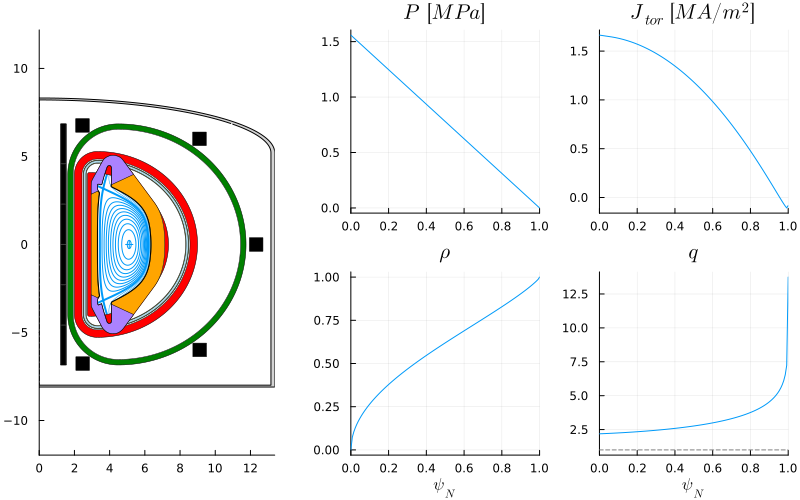

​


28×9 DataFrame
 Row │ group   details               type      ΔR         R_start   R_end     material      area       volume     
     │ String  String                String    Float64    Float64   Float64   String        Float64    Float64    
─────┼────────────────────────────────────────────────────────────────────────────────────────────────────────────
   1 │ in                                      1.19812     0.0       1.19812                16.4069      61.7556
   2 │ in                            oh        0.353738    1.19812   1.55186  ReBCO          4.84401     41.849
   3 │ in                                      0.0696444   1.55186   1.62151                 0.953697     9.50781
   4 │ hfs                           tf        0.310643    1.62151   1.93215  ReBCO         11.8523     120.754
   5 │ hfs                                     0.0696444   1.93215   2.00179                41.7773    2051.21
   6 │ hfs     low temp              shield    0.42866     2.00179   2.43045  

​


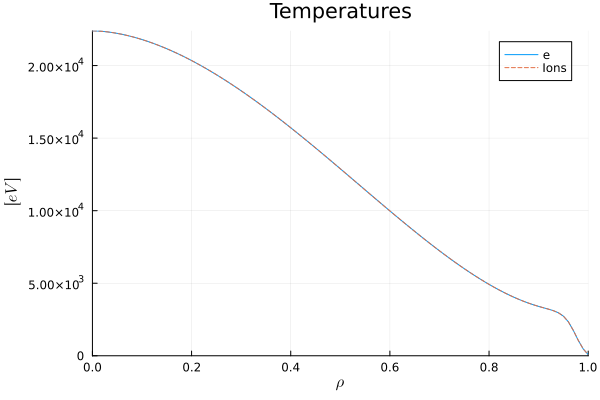

​


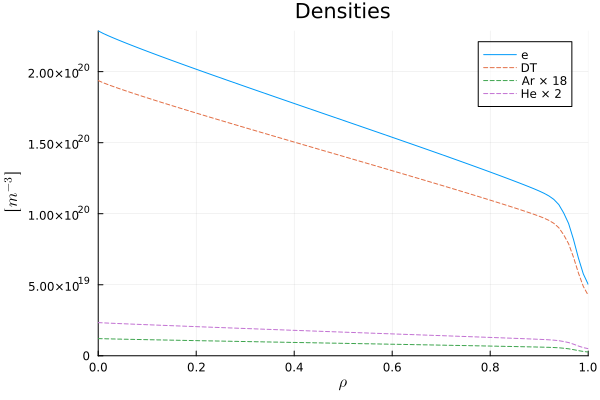

​


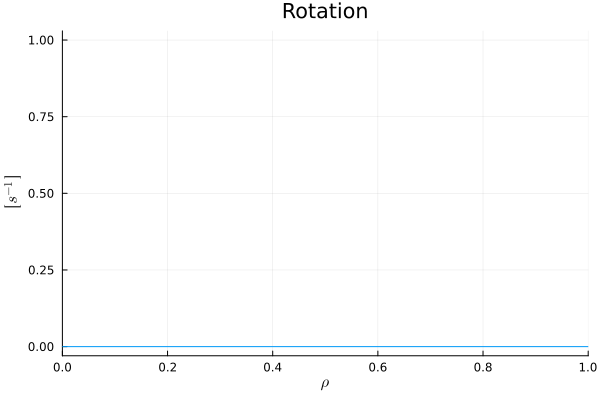

​


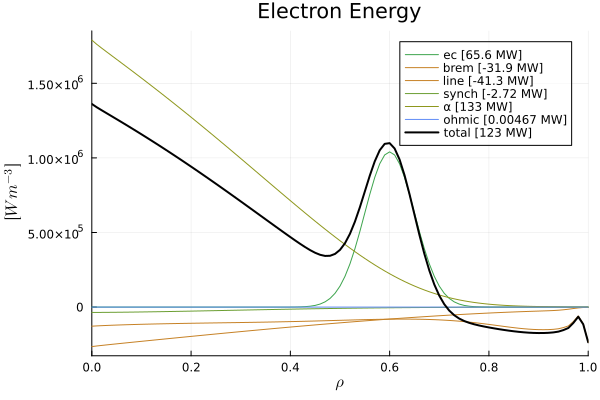

​


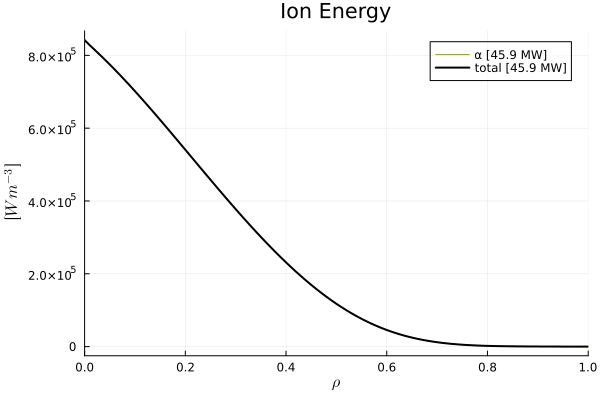

​


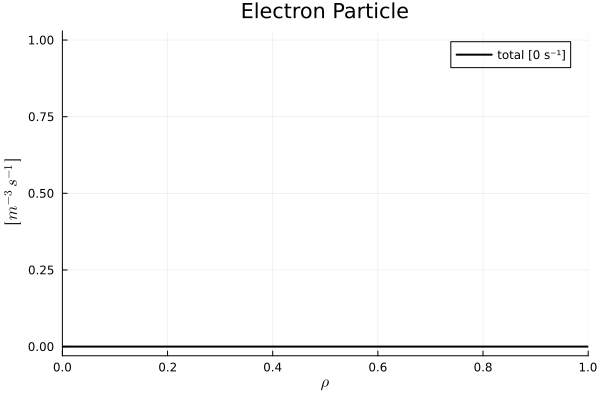

​


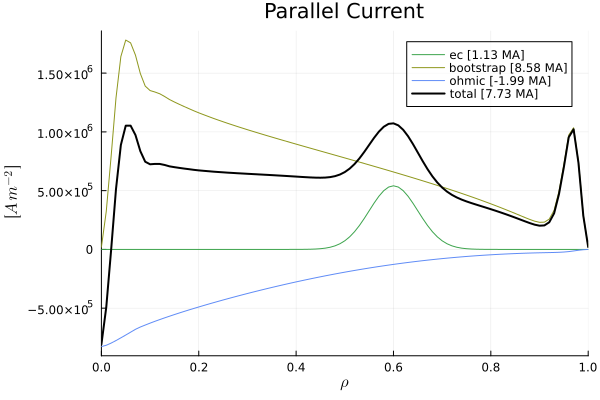

In [5]:
ini, act = FUSE.case_parameters(:FPP; version=:v1, init_from=:scalars);
ini.build.n_first_wall_conformal_layers = 3
dd = IMAS.dd()
FUSE.init(dd, ini, act; do_plot=false);
FUSE.digest(dd)

In [6]:
ini, act = FUSE.case_parameters(:FPP; version=:v1, init_from=:scalars);
ini.build.n_first_wall_conformal_layers = 2
dd = IMAS.dd()
FUSE.init(dd, ini, act; do_plot=false);
FUSE.digest(dd)

LoadError: Vector{Vector{Float64}} is the wrong type for build.structure[:].outline.r, it should be Vector{Float64})

In [7]:
ini, act = FUSE.case_parameters(:FPP; version=:v1, init_from=:scalars);
ini.build.n_first_wall_conformal_layers = 1
dd = IMAS.dd()
FUSE.init(dd, ini, act; do_plot=false);
FUSE.digest(dd)

LoadError: Vector{Vector{Float64}} is the wrong type for build.structure[:].outline.r, it should be Vector{Float64})

GEOMETRY                       EQUILIBRIUM                    TEMPERATURES                   DENSITIES                      
───────────────────────────    ───────────────────────────    ───────────────────────────    ───────────────────────────    
R0 → 4.82 [m]                  B0 → 4.71 [T]                  Te0 → 22.4 [keV]               ne0 → 2.29e+20 [m⁻³]           
a → 1.38 [m]                   ip → 8 [MA]                    Ti0 → 22.4 [keV]               ne_ped → 1.01e+20 [m⁻³]        
1/ϵ → 3.5 [m]                  q95 → 5.31                     <Te> → 9.55 [keV]              <ne> → 1.47e+20 [m⁻³]          
κ → 2.3                        βpol → 4.18                    <Ti> → 9.55 [keV]              ne0/<ne> → 1.55                
δ → 0.85                       βtor → 0.0813                  Te0/<Te> → 2.34                fGW → 1.26                     
ζ → 0.0423                     βn → 6.6                       Ti0/<Ti> → 2.34                zeff_ped → 2                   


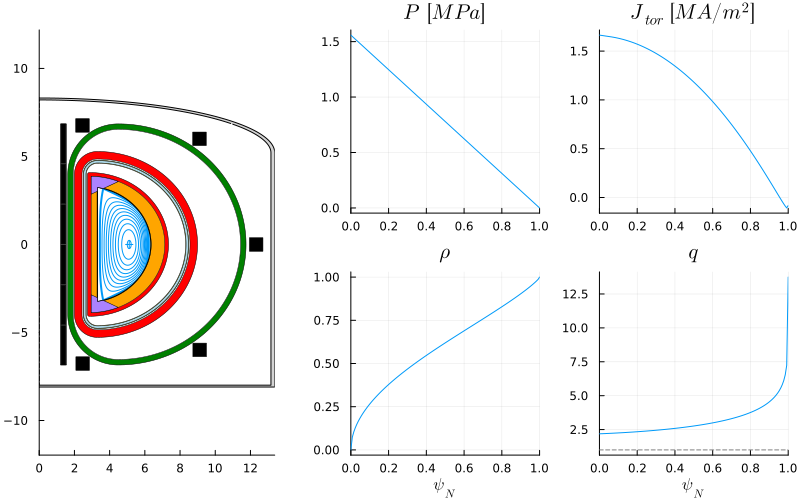

​


28×9 DataFrame
 Row │ group   details               type      ΔR         R_start   R_end     material      area       volume     
     │ String  String                String    Float64    Float64   Float64   String        Float64    Float64    
─────┼────────────────────────────────────────────────────────────────────────────────────────────────────────────
   1 │ in                                      1.19812     0.0       1.19812                16.4069      61.7556
   2 │ in                            oh        0.353738    1.19812   1.55186  ReBCO          4.84401     41.849
   3 │ in                                      0.0696444   1.55186   1.62151                 0.953697     9.50781
   4 │ hfs                           tf        0.310643    1.62151   1.93215  ReBCO         11.8523     120.754
   5 │ hfs                                     0.0696444   1.93215   2.00179                41.7773    2051.21
   6 │ hfs     low temp              shield    0.42866     2.00179   2.43045  

​


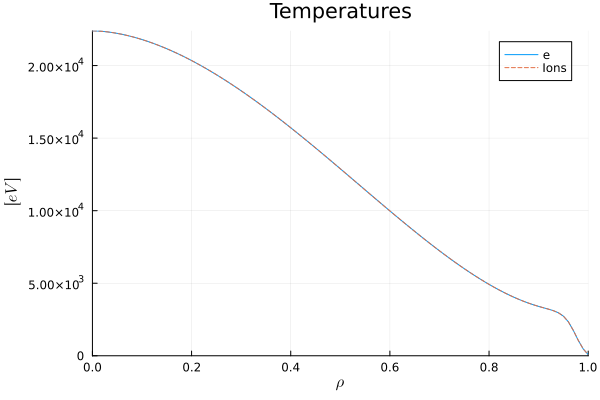

​


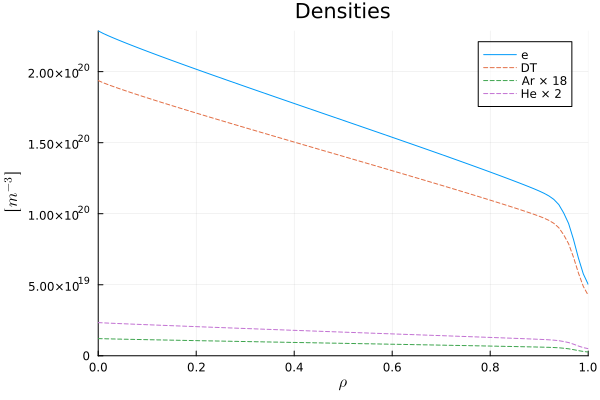

​


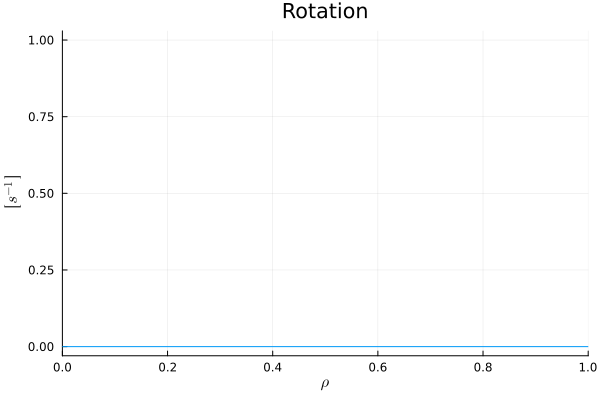

​


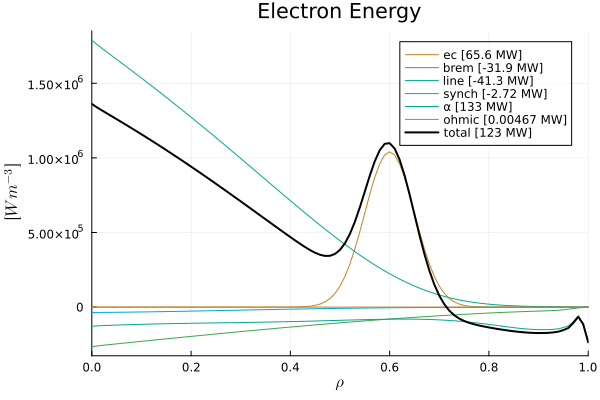

​


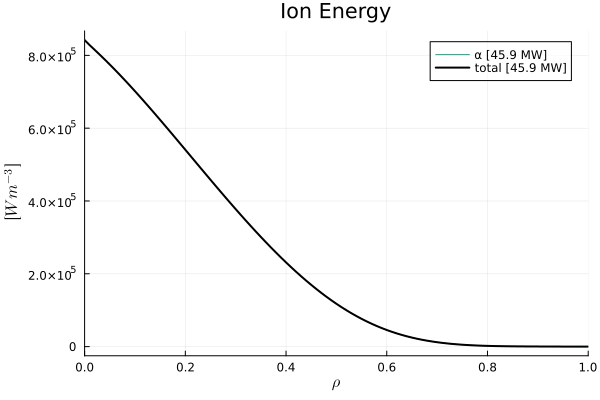

​


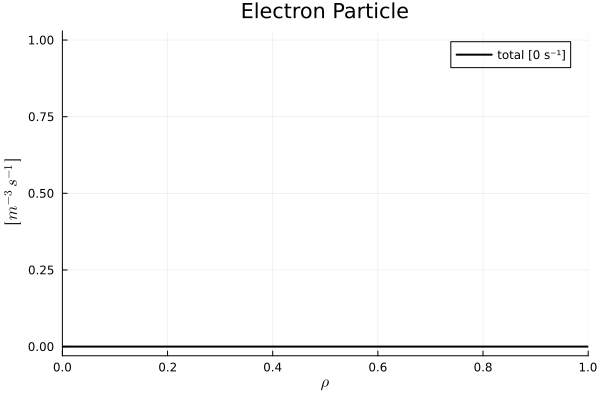

​


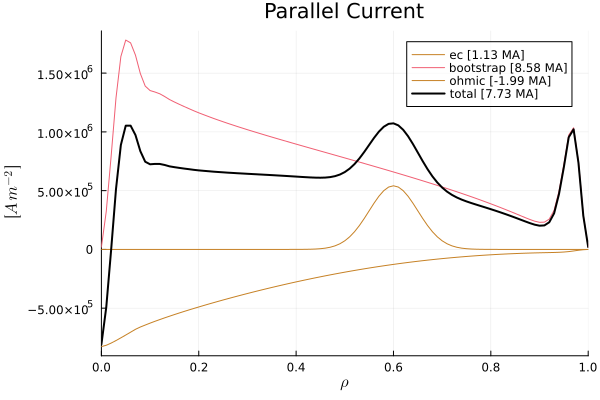

In [8]:
ini, act = FUSE.case_parameters(:FPP; version=:v1, init_from=:scalars);
ini.build.n_first_wall_conformal_layers = 0
dd = IMAS.dd()
FUSE.init(dd, ini, act; do_plot=false);
FUSE.digest(dd)